# Contents

---
---

## - From Bigdata to Hadoop

### &nbsp; &nbsp; &nbsp; - Why Hadoop?
### &nbsp; &nbsp; &nbsp; - Hadoop Architecture
### &nbsp; &nbsp; &nbsp; - Hadoop MapReduce
### &nbsp; &nbsp; &nbsp; - Setting up a Cluster
### &nbsp; &nbsp; &nbsp; - Hadoop Ecosystem

## - Using Hadoop with Python

### &nbsp; &nbsp; &nbsp; - Mapper in Python
### &nbsp; &nbsp; &nbsp; - Reducer in Python

## - Python Basics

### &nbsp; &nbsp; &nbsp; - Environment
### &nbsp; &nbsp; &nbsp; - Basic Syntax

## - Maching Learning in Python

### &nbsp; &nbsp; &nbsp; - About Machine Learning

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Some Mathematics
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - What is a Model?
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - A Decision Tree
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Deep Learning

### &nbsp; &nbsp; &nbsp; - Some Utilities for ML

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Ubuntu
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Python
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - PostgreSQL

## -

## Why Hadoop?
---

### - Massive amounts of data is too big to store and compute on a single computer

### &nbsp; &nbsp; &nbsp; - Hadoop Distributed File System (HDFS)
### &nbsp; &nbsp; &nbsp; - MapReduce programming model

### - Hardware failure is the norm rather than the exception

### &nbsp; &nbsp; &nbsp; - Detection of faults
### &nbsp; &nbsp; &nbsp; - Quick, automatic recovery

### -

## Hadoop Architecture
---
![Hadoop Ecosystem](resources.d/hadoop-architecture.png)
### -

## Hadoop MapReduce
---
![Hadoop Ecosystem](resources.d/hadoop-mapreduce.png)
### -

## Setting up a Cluster
---
### &nbsp; &nbsp; &nbsp; - Install Java, `JAVA_HOME`
### &nbsp; &nbsp; &nbsp; - Install `ssh`, `rsync`, `sshd`
### &nbsp; &nbsp; &nbsp; - `ssh` to the remote without a passphrase
### &nbsp; &nbsp; &nbsp; - Install Hadoop on all the machines in the cluster
### -

## Hadoop Ecosystem
---
![Hadoop Ecosystem](resources.d/hadoop-ecosystem.png)
### -

## Mapper in Python
---
```python
#!/usr/bin/env python3

from sys import stdin
from collections import Counter

c = Counter()

for line in stdin:
    c.update(line.strip().split())

for word, count in c.items():
    if word and count:
        print(word, count, sep='\t')
```
### -

## Reducer in Python
---
```python
#!/usr/bin/env python3

from sys import stdin
from collections import Counter

c = Counter()

for line in stdin:
    word, count = line.strip().split('\t')
    c.update({word: int(count)})

for word, count in c.items():
    print(word, count, sep='\t')
```
### -

## Running on Hadoop
---
```bash
$ ./bin/hadoop jar contrib/streaming/hadoop-*streaming*.jar \
    -file /home/lihz/mapper.py   \
    -mapper /home/lihz/mapper.py  \
    -file /home/lihz/reducer.py    \
    -reducer /home/lihz/reducer.py  \
    -input '/user/lihz/gutenberg/*'  \
    -output /user/lihz/gutenberg-output
```
### -

## Environment
---
### &nbsp; &nbsp; &nbsp; - Install Python 3
### &nbsp; &nbsp; &nbsp; - Install VSCode
### &nbsp; &nbsp; &nbsp; - Get Python Ext
### &nbsp; &nbsp; &nbsp; - Happy Coding
### -

## Basic Syntax
---

In [ ]:
# Hello, world! #

if __name__ == '__main__':
    print('Hello, world!')

In [ ]:
# Iterating: Iterator #

pets = ['cat', 'dog', 'pig']

for pet in pets:
    print(f'Got a `{pet}`')

In [ ]:
# Iterating: Generator #

def fib():
    a, b = 0, 1
    while True:
        a, b = b, a + b
        yield a

for b in fib():
    if b > 100:
        break
    print(b)

In [ ]:
# defining functions #

def function(arg1, arg2='arg2', *args, **kws):
    print('[1] arg1', arg1)
    print('[2] arg2', arg2)
    for arg in args:
        print('[3] arg', arg)
    for key, val in kws.items():
        print(f'[4] {key}', val)
    return arg1, arg2


function('par1')

function('par1', 'par2')

function(arg2='par2', arg1='par1')

function('par1', 'par2', 'par3', 'par4')

function('par1', 'par2', arg5='par5', arg6='par6')

In [ ]:
# using packages #

def search(keyword):
    from urllib.parse import quote
    from requests import get
    from bs4 import BeautifulSoup as Soup

    text = get(
        f'https://www.baidu.com/s?wd={quote(keyword)}',
        headers={
            'User-Agent': 'ozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
        },
    ).text
    soup = Soup(text, 'html5lib')
    print(soup.find(class_='nums_text').get_text(), end='\n\n')
    for i, result in enumerate(soup.find_all('h3')):
        print(f'  [{str(i+1).zfill(2)}] {result.get_text().strip()}')


if __name__ == '__main__':
    while True:
        keyword = input('Search: ')
        if not keyword:
            print('Bye')
            break
        try:
            search(keyword)
        except:
            pass


In [ ]:
# Writing a Web Server

from flask import Flask, escape, request

app = Flask(__name__)

@app.route('/<name>')
def hello(name):
  return f'Hello, {name}'


@app.route('/')
def world():
    return 'Hello, world'

if __name__ == '__main__':
    app.run()

## Some Mathematics
---
### &nbsp; &nbsp; &nbsp; - Leibniz formula for $\pi$ ${\pi \over 4} = {1 \over 1} - {1 \over 3} + {1 \over 5} - {1 \over 7} + {1 \over 9} \cdots$
### &nbsp; &nbsp; &nbsp; - Fourier Series
![Fourier](resources.d/fourier.png)
### -

## What Exactly is a Model?
---
![Atom Model](resources.d/atom-model.svg)
### -

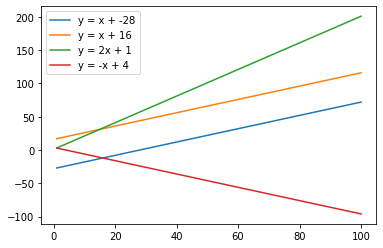

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 100, 100)
for k, b in (1, -28), (1, 16), (2, 1), (-1, 4):
    plt.plot(x, k*x+b, label=f'y = {k}x + {b}'.replace('1x', 'x'))
plt.legend(loc='best')
plt.show()


# what's model?
model = k, b

def function(x):
    return x * model[0] + model[1]

## A Decision Tree
### &nbsp; &nbsp; &nbsp; - [http://www.r2d3.us/visual-intro-to-machine-learning-part-1/](http://www.r2d3.us/%E5%9B%BE%E8%A7%A3%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0/)
### -

## Deep Learning
![Deep Learning](resources.d/deep-learning.png)
### -

## Some Utilities for ML
---
### &nbsp; &nbsp; &nbsp; - Ubuntu

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - First Class
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Consistency
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - `apt` Packages
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - `snap` Packages

### &nbsp; &nbsp; &nbsp; - Python

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Tensorflow
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - PyTorch

### &nbsp; &nbsp; &nbsp; - PostgreSQL

### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Window Functions
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Inheritance
### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Data Types

### -